In [ ]:
#boost tree
#xgboost
#lbgt
#GBDT

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#使用50%的样本数据 50%的特征
bagging = BaggingClassifier(KNeighborsClassifier() ,
                           max_samples=0.5, max_features=0.5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = [[0,0] , [1,1]]
Y=[0,1]

clf = RandomForestClassifier(n_estimators = 10)
clf = clf.fit(X,Y)

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
X  , y = make_blobs(n_samples=10000 , n_features=10 , centers=100,
                   random_state = 0)

clf = DecisionTreeClassifier(max_depth=None , min_samples_split=2,
                            random_state=0)

scores = cross_val_score(clf , X , y)
scores.mean()

0.9794087938205586

In [3]:
clf = RandomForestClassifier(n_estimators=10 , max_depth=None,
                            min_samples_split=2 , random_state=0)

scores = cross_val_score(clf , X , y)
scores.mean()

0.9996078431372549

In [4]:
clf = ExtraTreesClassifier(n_estimators=10 , max_depth=None,
                            min_samples_split=2 , random_state=0)

scores = cross_val_score(clf , X , y)
scores.mean()

0.99989898989899

In [5]:
#===
#adaboost
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
clf = AdaBoostClassifier(n_estimators = 100)
scores = cross_val_score(clf , iris.data , iris.target)
scores.mean()

0.9599673202614379

In [1]:
#===
#GBRT
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier



In [2]:
X , y = make_hastie_10_2(random_state=0)
X_train , X_test = X[:2000] , X[2000:]
y_train , y_test = y[:2000] , y[2000:]

clf = GradientBoostingClassifier(n_estimators=100,
                                learning_rate=1.0,
                                max_depth=1 ,
                                random_state=0).fit(X_train,y_train)
clf.score(X_test , y_test)

0.913

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor



In [5]:
X, y = make_friedman1(n_samples=1200 , random_state=0,noise=1.0)
X_train , X_test = X[:200],X[200:]
y_train , y_test = y[:200],y[200:]

est = GradientBoostingRegressor(n_estimators=100,
                               learning_rate=0.1,
                               max_depth=1,
                               random_state=0,
                               loss='ls').fit(X_train,y_train)

mean_squared_error(y_test , est.predict(X_test))

5.009154859960321

In [7]:
_ = est.set_params(n_estimators = 200,warm_start=True)
_ = est.fit(X_train , y_train)
mean_squared_error(y_test , est.predict(X_test))

3.840234741105356

In [1]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier



In [2]:
X , y = make_hastie_10_2(random_state = 0)
clf = GradientBoostingClassifier(n_estimators=100,
                                learning_rate = 1.0,
                                max_depth=1,
                                random_state=0).fit(X , y)
#每个特征的重要程度
clf.feature_importances_

array([0.11, 0.1 , 0.11, 0.1 , 0.09, 0.11, 0.09, 0.1 , 0.1 , 0.09])

In [5]:
#函数得到单变量与目标变量的相关性
#或者两个变量之间的相关性
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

%matplotlib inline

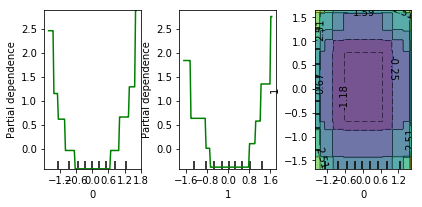

In [6]:
X , y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100,
                                learning_rate=1.0,
                                max_depth=1,
                                random_state=0).fit(X , y)

features = [0,1,(0,1)]
fig , axs = plot_partial_dependence(clf , X , features)

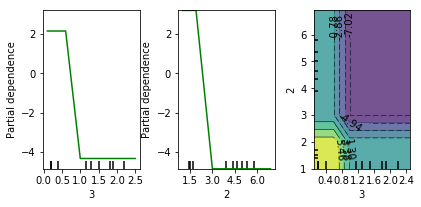

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

mc_clf = GradientBoostingClassifier(n_estimators=100,
                                   max_depth=1).fit(iris.data,iris.target)

features=[3,2,(3,2)]

fig , axs = plot_partial_dependence(mc_clf,iris.data,features , label=0)

In [10]:
#不进行绘图 返回数值
from sklearn.ensemble.partial_dependence import partial_dependence

pdp , axes = partial_dependence(clf , [0] , X=X)
pdp

array([[ 2.46643157,  2.46643157,  2.46643157,  2.46643157,  2.46643157,
         2.46643157,  1.15418258,  1.15418258,  1.15418258,  1.15418258,
         1.15418258,  0.61847569,  0.61847569,  0.61847569,  0.61847569,
         0.61847569,  0.61847569,  0.61847569,  0.61847569, -0.03524098,
        -0.03524098, -0.03524098, -0.03524098, -0.03524098, -0.03524098,
        -0.03524098, -0.03524098, -0.03524098, -0.03524098, -0.03524098,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.4

In [11]:
axes

[array([-1.62497054, -1.59201391, -1.55905727, -1.52610063, -1.49314399,
        -1.46018736, -1.42723072, -1.39427408, -1.36131744, -1.32836081,
        -1.29540417, -1.26244753, -1.22949089, -1.19653425, -1.16357762,
        -1.13062098, -1.09766434, -1.0647077 , -1.03175107, -0.99879443,
        -0.96583779, -0.93288115, -0.89992452, -0.86696788, -0.83401124,
        -0.8010546 , -0.76809797, -0.73514133, -0.70218469, -0.66922805,
        -0.63627142, -0.60331478, -0.57035814, -0.5374015 , -0.50444487,
        -0.47148823, -0.43853159, -0.40557495, -0.37261831, -0.33966168,
        -0.30670504, -0.2737484 , -0.24079176, -0.20783513, -0.17487849,
        -0.14192185, -0.10896521, -0.07600858, -0.04305194, -0.0100953 ,
         0.02286134,  0.05581797,  0.08877461,  0.12173125,  0.15468789,
         0.18764452,  0.22060116,  0.2535578 ,  0.28651444,  0.31947107,
         0.35242771,  0.38538435,  0.41834099,  0.45129762,  0.48425426,
         0.5172109 ,  0.55016754,  0.58312418,  0.6

In [12]:
###
#voting classifier
#集成 投票
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [15]:
iris = datasets.load_iris()
X , y = iris.data[: , 1:3] , iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr',clf1),
                                   ('rf',clf2),
                                   ('gnb',clf3)] , voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


I:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
I:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
I:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
I:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

In [16]:
#上面的例子是硬投票
#软投票
#为集成学习中的模型成员赋权重

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier


In [19]:
iris = datasets.load_iris()
X = iris.data[: , [0,2]]
y = iris.target

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf' , probability=True)
eclf = VotingClassifier(estimators=[('lr',clf1),
                                   ('rf',clf2),
                                   ('gnb',clf3)] , voting='soft', weights=[2,1,2])

clf1 = clf1.fit(X , y)
clf2 = clf2.fit(X , y)
clf3 = clf3.fit(X , y)
eclf = eclf.fit(X , y)

In [22]:
#使用网格搜索来调优
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)],voting='hard')

params = {'lr__C':[1.0,100.0],
         'rf__n_estimators':[20,200]}

grid = GridSearchCV(estimator=eclf , param_grid = params , cv=5)
grid = grid.fit(iris.data , iris.target)

I:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
I:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
I:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
I:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

In [24]:
eclf = VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)] , voting='soft')